In [17]:
# 代码保存成.py的形式，确定其他人可以import
%matplotlib inline
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

In [59]:
X = np.linspace(-10,10).reshape(-1,1)
X.shape

(50, 1)

In [69]:
y_simulate = np.sin(X/np.pi)
y = y_simulate + np.random.random(50).reshape(-1,1)/2
y.shape

(50, 1)

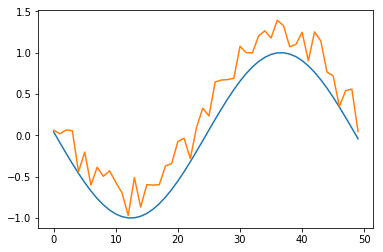

In [71]:
import matplotlib.pyplot as plt
plt.plot(y_simulate)
plt.plot(y)

In [70]:
lr = LinearRegression()
lr.fit(X,y)
y_predict_lr = lr.predict(X)

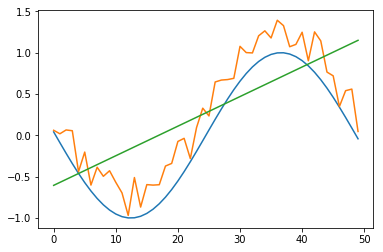

In [72]:
plt.plot(y_simulate)
plt.plot(y)
plt.plot(y_predict_lr)

In [91]:
    class LWLR(object):

        def __init__(self, k=1):
            self.k = k

        def fit(self, X, y):
            self.X = X
            self.y = y
            return self

        def predict(self, X):
            result = []
            for example in X:
                prediction = self._predict_single(example)
                result.append(prediction)
            return np.array(result)

        def _predict_single(self, x):
            # 1.算距离，写成向量
            distance = self.X - x

            # 2.距离转化成权重（也是向量）
            w = np.exp(-0.5 * distance ** 2 / self.k ** 2)

            # 3.权重，X,y 输入 sklearn的LinearRegression
            lr = LinearRegression().fit(self.X * np.sqrt(w), y * np.sqrt(w))

            # 4.预测
            y_predict_single = lr.predict(x.reshape(-1, 1))

            return y_predict_single[0]


In [100]:
lwlr = LWLR(k=0.5).fit(X,y)
y_predict_lwlr = lwlr.predict(X)

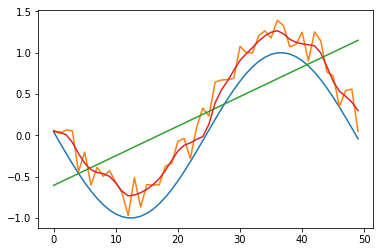

In [101]:
plt.plot(y_simulate)
plt.plot(y)
plt.plot(y_predict_lr)
plt.plot(y_predict_lwlr)
plt.show()